# analysis of CID data 

In [2]:
SAVE = True 
SAVE_PATH = "../charts/"
DATA_STORE_PATH_BASE = "../store/week1/"
DATA_STORE_PATH_WEEK = "../store/week2/"

In [3]:
EMPTY_CID = "QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn"
MY_PEERID = "12D3KooWBA3FLioUQPqtj3RT4fxbquGNyb2hfQwXq8UTt5xmxuCi"

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def reversed_sort_dict_by_value(dic:dict)-> dict:
    return {key:val for key, val in reversed(sorted(dic.items(), key=lambda item: item[1]))}

def drop_none_unique_peers(df:pd.DataFrame) -> pd.DataFrame:
    df_filtered = df.drop_duplicates(subset=['peer'], keep=False)
    df_filtered = df_filtered[df_filtered["peer"] != MY_PEERID]
    df_filtered = df_filtered.reset_index()
    return df_filtered

def make_peerid_short(df:pd.DataFrame) -> pd.DataFrame:
    df["peer"] = df["peer"].apply(lambda p: p[:3] + '...' + p[-5:])
    return df 

In [6]:
df = pd.read_csv(DATA_STORE_PATH_BASE + "cid_data.csv")
#df = drop_none_unique_peers(df)
df = make_peerid_short(df)
print(len(df))
df.head()

83099


,peer,cid,filename,size,format
0,12D...vvKGa,QmbhXhzx9eY9e5QpbeDXQ2ozk9KgdJ7VALgfXRCbohtsD5,NONE,18,text/plain; charset=utf-8
1,QmY...yJwiJ,QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU...,CODE_OF_CONDUCT.md,5239,text/plain; charset=utf-8
2,QmY...yJwiJ,QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU...,LICENSE,34444,text/plain; charset=utf-8
3,QmY...yJwiJ,QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU...,config.js,2487,text/plain; charset=utf-8
4,QmY...yJwiJ,/ipfs/QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUP...,style.css,9105,text/plain; charset=utf-8


In [7]:
len(df["peer"].unique())

333

max 16384
min 1


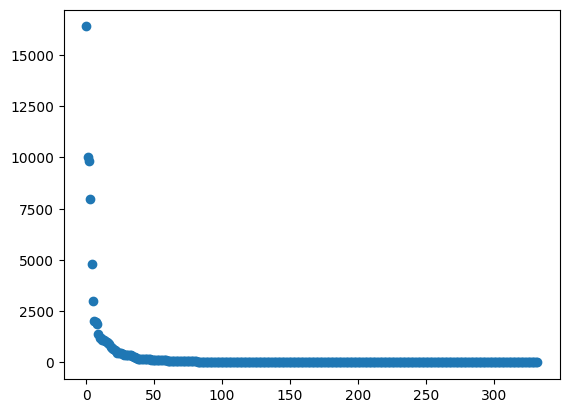

In [8]:
file_per_peer = df["peer"].value_counts()
print("max", file_per_peer.max())
print("min", file_per_peer.min())
fig, ax = plt.subplots()
ax.scatter(range(0, len(file_per_peer)), file_per_peer)
if SAVE: 
    plt.savefig(SAVE_PATH+"files_per_peer.png",bbox_inches='tight')

<Axes: xlabel='number of files with format', ylabel='file formats'>

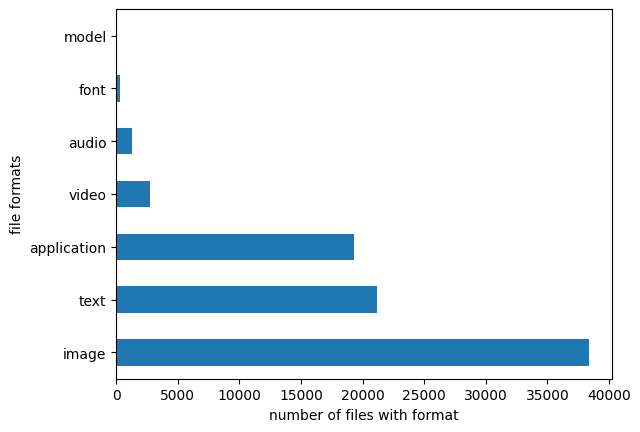

In [9]:
format_count = df["format"]
make_simple_format = lambda f: f.split("/")[0]
format_count = format_count.apply(make_simple_format)
format_count.value_counts().plot.barh(xlabel="number of files with format", ylabel="file formats")

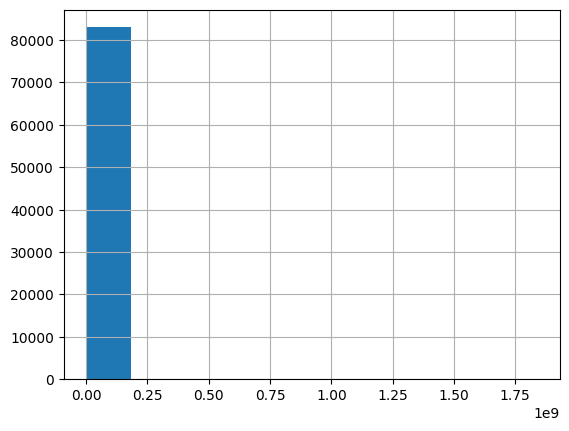

In [10]:
files_with_size = df["size"].hist()

In [11]:

simple_format = df["format"].apply(make_simple_format)
peers_formats = df[["peer", "format"]] 
peers_formats["format"] = simple_format
peers_formats

/tmp/ipykernel_34497/3817171238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peers_formats["format"] = simple_format


,peer,format
0,12D...vvKGa,text
1,QmY...yJwiJ,text
2,QmY...yJwiJ,text
3,QmY...yJwiJ,text
4,QmY...yJwiJ,text
...,...,...
83094,12D...59mke,audio
83095,12D...59mke,audio
83096,12D...59mke,audio
83097,12D...59mke,audio


In [12]:
df = pd.read_csv(DATA_STORE_PATH_BASE + "cid_data.csv")

In [13]:

file_per_peer = df["peer"].value_counts()
file_per_peer.head(10)

peer
12D3KooWN5YkXpdcYvBhDpedP9YHdQDVzYuqDFgf2GJCqsVvgyTb    16384
12D3KooWAGKEpNe7AJpQvYgMcXd3A1vsBpwTrHzqvYUvQG68xd2R    10000
12D3KooWFeHu75n14FDrSUDXbb7cXhRUJCYxsRCQLA8nZ9R7uJEg     9805
12D3KooWFaioDnjkzfXUU8bUeNiXLKi5vpQsd5BZoRAKV9Zr5QJV     7981
12D3KooWLibYn5XVifbpZmAncfXvPjukdn56NMirZ9nBWjNsk173     4799
QmXeQ6JyZG4eN1LzzPYHdNLQakX9uGf77AykdJ1yJ6WChh           2991
12D3KooWBMo99iEN3u4uuy2N8pTtnSiTiecvc83sHj48xi1TdGmf     2008
12D3KooWT3NeueHk2diQHM5t9apAe7ry73ACPAENxxsFtkXWLnkJ     1969
12D3KooWD9QV2bTvvR7WPcYnX6Lbooev5mVAWBmqCKRjN5pASN31     1880
12D3KooWGebRQ7bhVuj1s246KRJQLCnaBDQuhMkiqvGjGvD7T4us     1387
Name: count, dtype: int64

In [14]:
df[df["peer"] == "12D3KooWLibYn5XVifbpZmAncfXvPjukdn56NMirZ9nBWjNsk173"]["cid"].values

array(['/ipfs/QmVVaD6vJD1Y5TFYyHfPbcNYZU5Ab7PMrcBg1XjgsFPEDb/20220406ombudsman/index.html',
       'QmVVaD6vJD1Y5TFYyHfPbcNYZU5Ab7PMrcBg1XjgsFPEDb/404.html',
       '/ipfs/QmVVaD6vJD1Y5TFYyHfPbcNYZU5Ab7PMrcBg1XjgsFPEDb/9-maya-1992-goda-v-moskve-sostoyalsya-samyy-neobychnyy-parad-lesslesspobedy-miragreatergreater-marshem-po-gorodu-proshli-veterany-voyny-iz-rossii-francii-ssha-i-dazhe-germanii-vot-kak-vyglyadel-etot-den/index.html',
       ...,
       '/ipfs/QmVVaD6vJD1Y5TFYyHfPbcNYZU5Ab7PMrcBg1XjgsFPEDb/znachitelnye-uspehi-chto-uchitelya-rasskazyvayut-shkolnikam-pro-lesslessantirossiyskie-sankciigreatergreater-metodichka/index.html',
       '/ipfs/QmVVaD6vJD1Y5TFYyHfPbcNYZU5Ab7PMrcBg1XjgsFPEDb/zorge-komanda-vo-vladivostoke-zhenshchina-oblila-kraskoy-pamyatnik-razvedchiku-a-potom-prishel-bastrykin-mat-dvuh-docherey-otpravili-v-sizo-a-detey-zabrali-v-socialnyy-centr/index.html',
       '/ipfs/QmVVaD6vJD1Y5TFYyHfPbcNYZU5Ab7PMrcBg1XjgsFPEDb/zyabko-stydno-osvobozhdenno-putevye-zametki-russko

In [32]:
ext = lambda f: f.split(".")[-1]

df_ext = df["filename"].dropna().apply(ext).value_counts()
df_ext = df_ext[df_ext.values > 3]
df_ext["js"]

3895